In [58]:
# TimeSeries can now load CSV data directly
using TimeSeriesKit
using Plots

Time Series length: 34
Years: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Emissions data: Float32[5.1, 4.2, 2.3, 1.1, -0.8, -0.9, -1.0, -0.5, -0.4, 0.9, -0.8, -1.0, -0.2, 0.0, 1.6, 2.0, 1.9, 2.3, 1.9, 3.2, 4.7, 4.2, 3.5, 4.1, 6.1, 5.6, 4.7, 4.0, 5.6, 4.7, 5.8, 6.7, 8.4, 7.8]


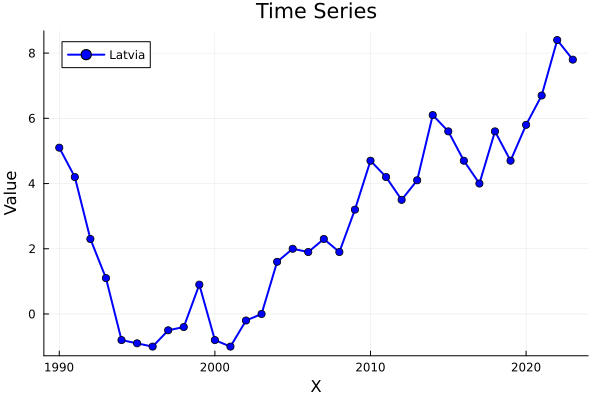

In [59]:
# Create TimeSeries for Czechia - loads CSV internally
poland = TimeSeries("data/emissions.csv", "Latvia")

println("Time Series length: $(length(poland))")
println("Years: $(poland.timestamps)")
println("Emissions data: $(poland.values)")
plot_timeseries(poland)

RMSE: 1.1804394169180794


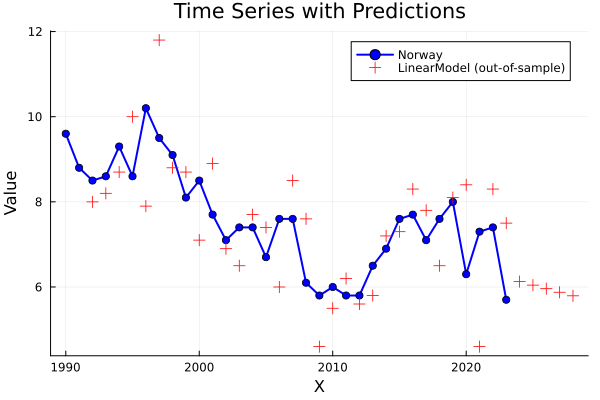

In [60]:
# Example: Using the TimeSeries with TimeSeriesKit models

# Load TimeSeries directly from CSV
ts = TimeSeries("data/emissions.csv", "Norway")

# Fit a Linear model
linear = LinearModel(sliding_window=2)

predictions = iterative_predict(linear, ts, 5)
println("RMSE: $(rmse(ts, predictions))")

plot_timeseries(ts, predictions)

In [62]:
using TimeSeriesKit
configs = Dict(
    RidgeModel => Dict(:λ => [0.9, 0.99], :sliding_window => [5, 7, 10]),  # No parameters to tune
    LinearModel => Dict(:sliding_window => [3, 5, 7]),
    SESModel => Dict(:alpha => [ 0.5, 0.7, 0.9]),
    ARModel => Dict(:p => [1, 2, 3])
)
result = grid_search(configs, ts, 5, verbose=true)
best_model = result.best_model
println("Best model: $best_model")
result.results_df


Testing model: LinearModel

Testing: sliding_window=3
Split 1: Train len: 10, Test len: 5
  RMSE: 1.3857, MAE: 1.3055
Split 2: Train len: 15, Test len: 5
  RMSE: 0.7605, MAE: 0.6986
Split 3: Train len: 20, Test len: 5
  RMSE: 0.6561, MAE: 0.5675
Split 4: Train len: 25, Test len: 5
  RMSE: 2.2504, MAE: 2.2108
Split 5: Train len: 30, Test len: 4
  RMSE: 0.8849, MAE: 0.6958
✓ Score: 1.1875

Testing: sliding_window=5
Split 1: Train len: 10, Test len: 5
  RMSE: 1.3857, MAE: 1.3055
Split 2: Train len: 15, Test len: 5
  RMSE: 0.7605, MAE: 0.6986
Split 3: Train len: 20, Test len: 5
  RMSE: 0.6561, MAE: 0.5675
Split 4: Train len: 25, Test len: 5
  RMSE: 2.2504, MAE: 2.2108
Split 5: Train len: 30, Test len: 4
  RMSE: 0.8849, MAE: 0.6958
✓ Score: 1.1875

Testing: sliding_window=7
Split 1: Train len: 12, Test len: 5
  RMSE: 1.0485, MAE: 0.9901
Split 2: Train len: 17, Test len: 5
  RMSE: 0.7529, MAE: 0.7355
Split 3: Train len: 22, Test len: 5
  RMSE: 1.6412, MAE: 1.3824
Split 4: Train len: 27, Tes

Row,model,mean_rmse,std_rmse,mean_mae,std_mae,params,fitted_params
,String,Float64,Float64,Float64,Float64,String,String
1,SESModel,0.912262,0.342436,0.784169,0.319862,alpha=0.9,"alpha=0.9, level=5.8682"
2,SESModel,0.939879,0.31952,0.812691,0.290444,alpha=0.7,"alpha=0.7, level=6.1865"
3,SESModel,0.998407,0.32283,0.879863,0.279385,alpha=0.5,"alpha=0.5, level=6.4882"
4,ARModel,1.03511,0.417578,0.890382,0.394471,p=1,"coefficients=[0.7784], intercept=1.5753"
5,ARModel,1.0692,0.378941,0.925623,0.406215,p=2,"coefficients=[0.6101, 0.2143], intercept=1.2198"
6,LinearModel,1.18752,0.656744,1.09565,0.686316,sliding_window=3,"intercept=174.8192, slope=-0.0833"
7,LinearModel,1.18752,0.656744,1.09565,0.686316,sliding_window=5,"intercept=174.8192, slope=-0.0833"
8,LinearModel,1.19316,0.418851,1.09017,0.353782,sliding_window=7,"intercept=174.8192, slope=-0.0833"
9,ARModel,1.23518,0.565335,1.06085,0.656105,p=3,"coefficients=[0.5537, 0.0551, 0.25], intercept=0.942"


Parameters: Dict{Symbol, Any}(:alpha => 0.9, :level => 5.868165397062024)
Cross-validated RMSE: 0.9122619244493857


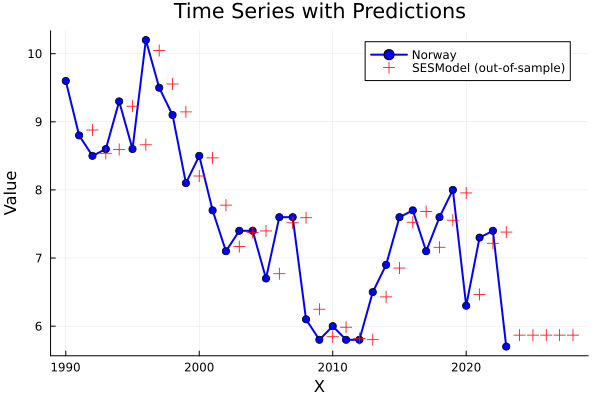

In [63]:

println("Parameters: $(get_parameters(best_model))")

predictions = iterative_predict(best_model, ts, 5)

cross_validate_rmse = cross_validate(best_model, ts, 5).mean_rmse
println("Cross-validated RMSE: $cross_validate_rmse")

plot_timeseries(ts, predictions)

# AR(2) On Random Walk

Cross-validated RMSE: 2.213289036687662
TimeSeries{Float64}([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], [-0.917984951115881, -1.8642654587287393, -3.5138890237941696, -3.909985390510385, -1.237816510110286, -0.7982473459342406, -0.1652581129792533, -0.849028642405042, -3.5587496633305893, -4.899830507085912, -5.213740279820361, -5.502834037414798, -3.5814609720987063, -2.730797334831381, -0.3963105797331482, -1.0149436817124982, -0.8435946559054541, -0.614511603846086, -0.5031829436777346, 0.11590750063206057, 0.02231187630866549, -1.1069339682226964, -2.757835209331253, -2.922342990158476, -3.8586755618457538, -3.0097335633008035, -4.7025748

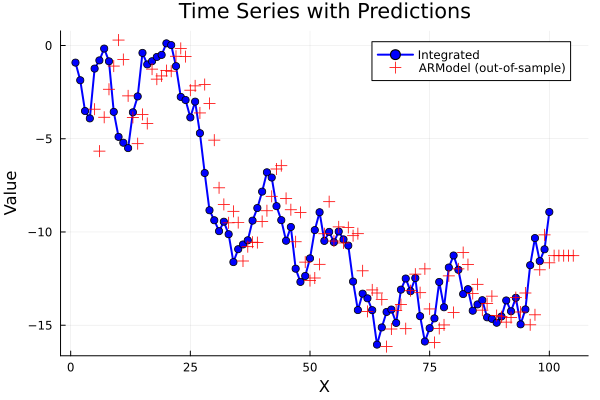

In [92]:
ar = ARModel(p=2)

white = integrate(TimeSeries(randn(100)))

predictions = iterative_predict(ar, white, 5)
cross_validate_rmse = cross_validate(ar, white, 5).mean_rmse
println("Cross-validated RMSE: $cross_validate_rmse")
println(white)
plot_timeseries(white, predictions)